# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','no-latex', 'grid']) #ieee, grid

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

from funcs import *
from stats import *
from Fit import *

/home/banana33/Documents/Lab2/Circuiti_3/Fit.py:87: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(_x_range, self.model(_x_range, **self.values), label=f'fit \n $\chi^2$ = {round(self.fval/self.ndof, 2)}', color='red')


# Functions

In [2]:
def H_R(w,tau, a):
    return w*tau/np.sqrt(1+np.power(w*tau,2)) + a

def H_C(w,tau, a):
    return 1/np.sqrt(1+np.power(w*tau,2)) + a

def fase_R(w,tau, a, b):
    return np.pi/2 + b*np.arctan(w*tau) + a

def fase_C(w,tau, a, b):
    return b*np.arctan(w*tau) + a

# RC

In [3]:
if 1:
    path_folder = 'data.leo/RC/'
    V_res, V_c, fase_res, fase_c = [], [], [], []
    freqs = []
    for i in sorted([int(i) for i in os.listdir(path_folder)]):

        path = path_folder+str(i)+'/'

        # V_SGN, V_MTH, dt_CH1, dt_MTH = analize(path, frequency=i, force=True, verbose=False)
        CH1,SGN,MTH, V_SGN, V_MTH, zero_CH1, zero_SGN, zero_MTH, m1, m2, m3, dt_CH1, dt_MTH = analize(path, i, force=True, prec=1e-8,verbose=True)
        
        # x=np.linspace(np.min(CH1[0]), np.max(CH1[0]), 100)

        # plt.figure(figsize=(10,4))
        # plt.plot(x, sine(x, **m1.values.to_dict()), label='CH1 fit', color='red')
        # plt.plot(x, sine(x, **m2.values.to_dict()), label='SGN fit', color='blue')
        # plt.plot(x, sine(x, **m3.values.to_dict()), label='MTH fit', color='green')
        
        # # plt.plot(CH1[0], CH1[1], label='CH1', color='red')
        # # plt.plot(SGN[0], SGN[1], label='SGN', color='blue')
        # # plt.plot(MTH[0], MTH[1], label='MTH', color='green')

        # plt.scatter(zero_CH1, 0, color='red', label='zero CH1')
        # plt.scatter(zero_SGN, 0, color='blue', label='zero SGN')
        # plt.scatter(zero_MTH, 0, color='green', label='zero MTH')
        # plt.legend(ncol=2)
        # plt.show()
        # print(i, dt_CH1, dt_MTH)

        V_res.append(V_SGN)
        V_c.append(V_MTH)
        fase_res.append(dt_CH1*i*2*np.pi)
        fase_c.append(dt_MTH*i*2*np.pi)
        freqs.append(i)

    V_res = np.array(V_res)
    V_c = np.array(V_c)
    fase_res = -np.array(fase_res)
    fase_c = -np.array(fase_c)
    freqs = np.array(freqs)

# Modulo

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_34009/2222209159.py:10: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frequency $\omega$ [Hz]')


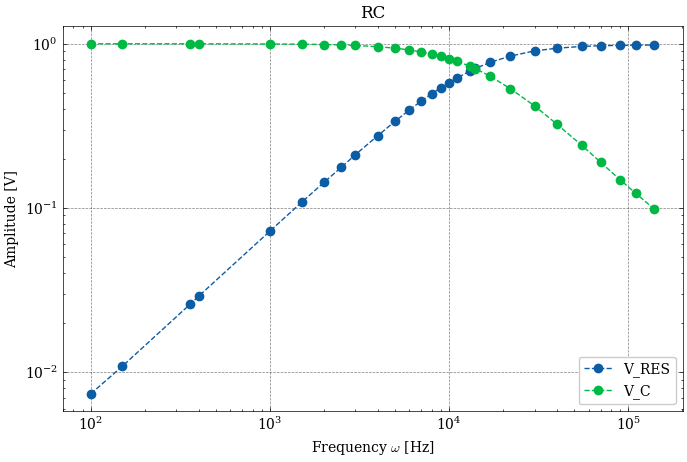

In [4]:
plt.figure(figsize=(8,5))
x = np.linspace(np.min(freqs),np.max(freqs),1000)

# plt.plot(x, H_R(x*2*np.pi, 1e3*12e-9, 0), label='Teorico')
# plt.plot(x, H_C(x*2*np.pi, 1e3*12e-9), label='Teorico')

plt.plot(freqs, V_res, 'o--', label='V_RES')
plt.plot(freqs, V_c, 'o--', label='V_C')
plt.title('RC')
plt.xlabel('Frequency $\omega$ [Hz]')
plt.ylabel('Amplitude [V]')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

## R

6030.413913256644
{'tau': 9.601885858090574e-07, 'a': 0.0031085367788544157}
0.12391480680425013


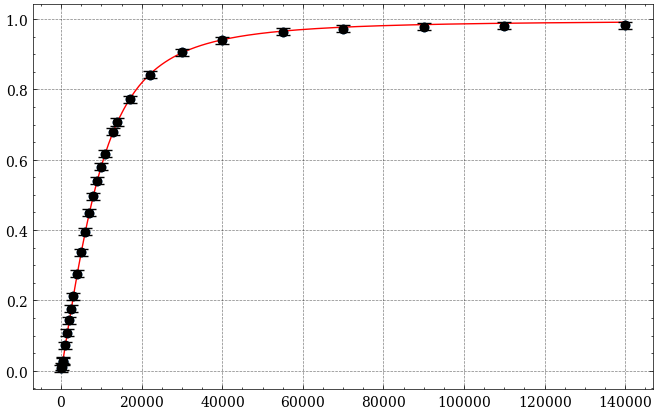

In [5]:
f = Fit(freqs, V_res, H_R, 0.01, kwargs={'tau':1e3*12e-9, 'a':0.})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values['tau']/12e-9)
print(f.errors)
print(f.fval/f.ndof)

## C

6008.274946572713
{'tau': 1.0356454758767752e-06, 'a': 0.003002512676329814}
0.027793217143620878


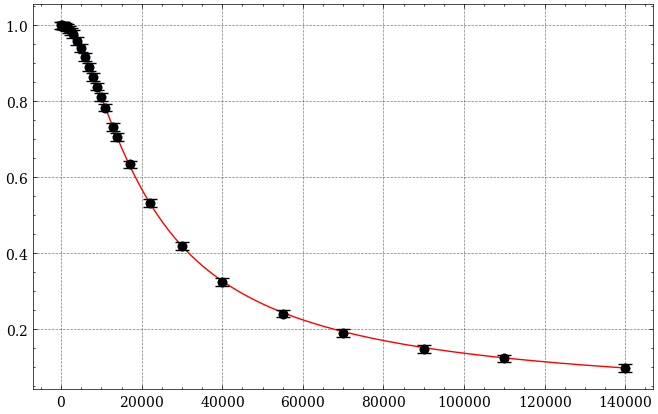

In [6]:
f = Fit(freqs, V_c, H_C, 0.01, kwargs={'tau':1e3*12e-9, 'a':0.})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values['tau']/12e-9)
print(f.errors)
print(f.fval/f.ndof)

# Fase

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\o'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_34009/214786732.py:7: SyntaxWarning: invalid escape sequence '\p'
  plt.title('$\phi_C$')
/tmp/ipykernel_34009/214786732.py:8: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frequency $\omega$ [rad/s]')
/tmp/ipykernel_34009/214786732.py:17: SyntaxWarning: invalid escape sequence '\p'
  plt.title('$\phi_R$')
/tmp/ipykernel_34009/214786732.py:18: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Frequency $\omega$ [rad/s]')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is call

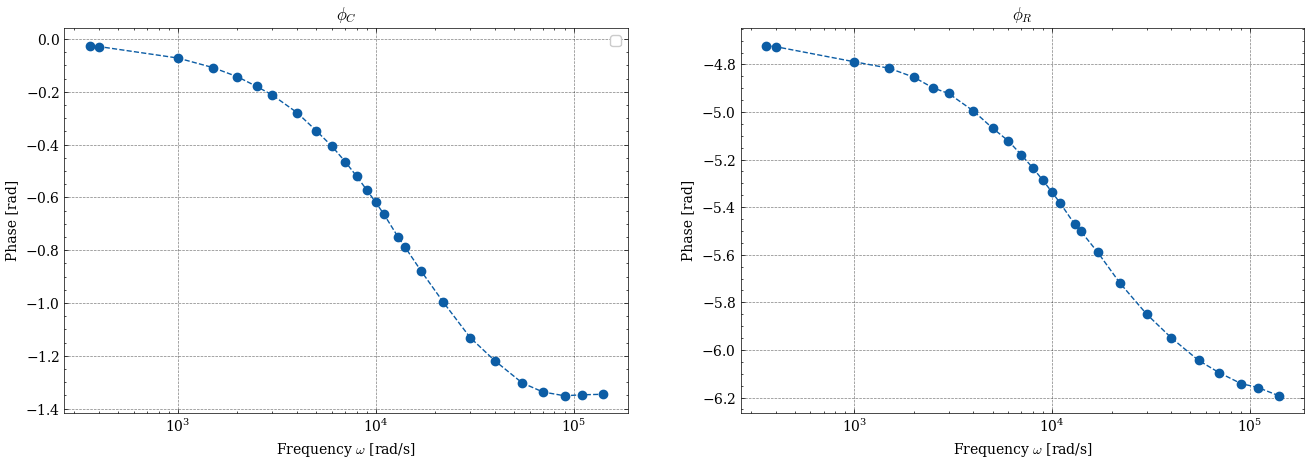

In [7]:
x = np.linspace(np.min(freqs),np.max(freqs),1000)

plt.subplots(1,2,figsize=(16,5))
plt.title('Dati')
plt.subplot(1,2,1)
plt.plot(freqs[2:], fase_c[2:],'o--', lw=1)
plt.title('$\phi_C$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.legend()
plt.xscale('log')

plt.subplot(1,2,2)
plt.plot(freqs[2:], fase_res[2:], 'o--', lw=1)
# plt.plot(x, fase_C(x*2*np.pi, 1e3, 12e-9, 0), label='Teorico')
# plt.plot(x, fase_R(x*2*np.pi, 1e3, 12e-9), label='Teorico')
plt.title('$\phi_R$')
plt.xlabel('Frequency $\omega$ [rad/s]')
plt.ylabel('Phase [rad]')
plt.xscale('log')

# plt.savefig('imgs/RC/fasi_no_log.jpeg', bbox_inches='tight', dpi=200)
plt.show()

## R

{'tau': 7.219928893051667e-05, 'a': -6.2791442658383545, 'b': -1.006180518602639}
{'tau': 4.488626577495857e-08, 'a': 0.0002273472660177501, 'b': 0.00020613363517208835}
R =  6.016607410876389
145.42672954328435


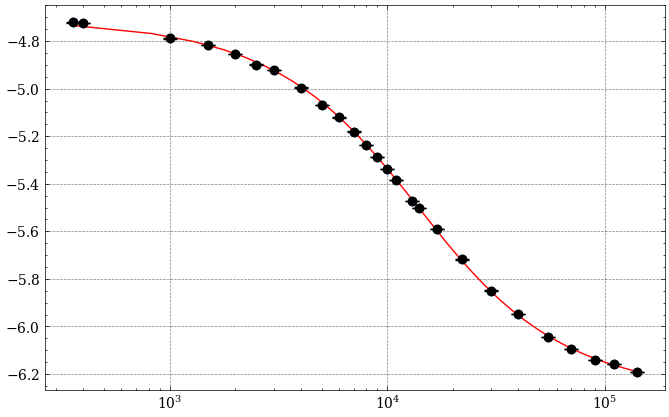

In [8]:
f = Fit(freqs[2:], fase_res[2:], fase_R, 0.0005, kwargs={'tau':12e-3, 'a':2*np.pi, 'b':-1})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values)
print(f.errors)
print('R = ', f.values['tau']/12e-6)
print(f.fval/f.ndof)
plt.xscale('log')

In [9]:
print(f.values['b']*2*np.pi)

-6.322018650854437


## C

{'tau': -7.91481956517778e-05, 'a': 0.007211900853352822, 'b': 0.9492586211259495}
{'tau': 5.128731613325169e-07, 'a': 0.0023308055188012307, 'b': 0.0020369471029650973}
10.976448905233049
5.96436782097212


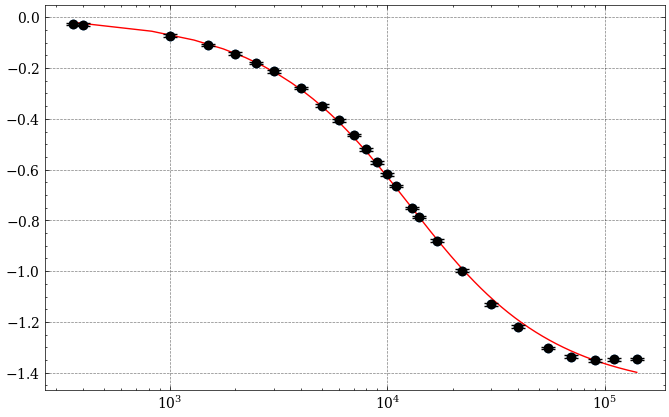

In [10]:
f = Fit(freqs[2:], fase_c[2:], fase_C, 0.005, kwargs={'tau':12e-6, 'a':0, 'b':1})
f.fit()
fig, ax = f.visualize()
fig.set_size_inches(8,5)
print(f.values)
print(f.errors)
print(f.fval/f.ndof)
print(f.values['b']*2*np.pi)
plt.xscale('log')